In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [3]:
from nltk.corpus import stopwords

import string

In [12]:
import pickle

In [4]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [5]:
df = pd.read_csv('modeling_2.csv', index_col = 'Unnamed: 0')

In [6]:
df.head()

,name,rating,review_date,reviewer,review_url,neighborhood,review,headline,tokens,vocabulary,area,num_rating,af_avg_pol,af_min_pol,af_max_pol,af_std_pol,headline_sent,amazing,awesome,bastard,breathtaking,brilliant,catastrophic,damned,ecstatic,exuberant,fabulous,fantastic,fraud,fun,funnier,funny,godsend,heavenly,hell,masterpiece,miracle,outstanding,prick,rapturous,rejoice,slut,stunning,superb,supreme,terrific,terrifically,thrilled,torture,tortured,triumph,triumphant,win,winning,wins,wonderful,wonderfully,wow,x0_Frank Bruni,x0_Pete Wells,x0_Sam Sifton,x0_Brooklyn,x0_Downtown,x0_Midtown,x0_Other,x0_Uptown
0,Hanon,★★,2019-05-21,Pete Wells,https://www.nytimes.com/2019/05/21/dining/hano...,Williamsburg,"Hanon, a new udon shop in Williamsburg, Brookl...","Udon, Innovated for Your Pleasure","['hanon', 'udon', 'williamsburg', 'brooklyn', ...",416,Brooklyn,2,0.886364,-2.0,6.0,1.654414,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Del Posto,★★★,2019-05-14,Pete Wells,https://www.nytimes.com/2019/05/14/dining/del-...,Chelsea,"More than a year ago, I was on the verge of re...","In Del Posto’s New Era, Cuisine and Service Ar...","['ago', 'verge', 'reviewing', 'del', 'posto', ...",605,Midtown,3,0.716216,-6.0,8.0,2.016957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018381,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,The Freakin Rican,★,2019-05-07,Pete Wells,https://www.nytimes.com/2019/05/07/dining/the-...,Astoria,It is true that the bacalaitos at the Freakin ...,Pasteles and Two Kinds of Fried Chicken at the...,"['true', 'bacalaitos', 'freakin', 'rican', 'as...",471,Other,1,0.865385,-2.0,5.0,1.593603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Wayan,★★,2019-04-23,Pete Wells,https://www.nytimes.com/2019/04/23/dining/waya...,NoLIta,If you ate at Spice Market before it closed tw...,Tapping a Family Connection to Indonesian Food,"['spice', 'market', 'closed', 'year', 'ago', '...",426,Downtown,2,0.750000,-4.0,5.0,1.854050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Niche,★,2019-04-16,Pete Wells,https://www.nytimes.com/2019/04/16/dining/nich...,Lower East Side,"In 2012 and 2013, when people were lining up a...",Ramen Without Broth? A Chef Doubles Down on a ...,"['people', 'lining', 'smorgasburg', 'houston',...",416,Downtown,1,0.387755,-4.0,4.0,1.536180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Basline Models with TF-IDF

In [16]:
X = df['review']
y = df['num_rating']

## TF-IDF

In [8]:
def tfidf(X, y,  stopwords_list): 
    '''
    Generate train and test TF-IDF vectorization for our data set
    
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    vec = TfidfVectorizer(stop_words=stopwords_list)
    
    tf_idf_train = vec.fit_transform(X_train)
    tf_idf_test = vec.transform(X_test)
    
    return tf_idf_train, tf_idf_test, y_train, y_test, vec


In [13]:
basic_stopwords_list = stopwords.words('english')+ list(string.punctuation)+ list(string.digits)

In [14]:
NYT_stoplist = ['follow','nyt','food','twitter','cooking','instagram','facebook','youtube','pinterest',
                'recipe','suggestions','tips','shopping','advice','food', 'restaurant','atmosphere','sound','wine',
                'list','am','pm', 'daily', 'monday','tuesday','wednesday','thursday','friday','saturday','sunday',
                'hours','wheelchair','access', 'street','mr', 'dinner','dishes', 'dish', 'new', 'sauce', 'made', 'mr.', 
                'room', 'table', 'would', 'new', 'york','menu','one','two','three','ave','came', 'table', 'get', 'year',
                'water', 'go', 'along', 'first', 'second', 'restaurant', 'new', 'york', 'cooking', 'shop', 'might', 
                'also', 'make', 'made', 'food', 'menu', 'meal', 'list', 'dish', 'table', 'dining', 'server', 'room', 
                'floor','served', 'may', 'want', 'brought', 'night', 'customer', 'said', 'say', 'come', 'dinner', 'le',
                'name', 'time', 'chef', '!', 'side', 'day', 'night', 'ate', 'back', 'customers', 'restaurants',
                'ingredient', 'cook','dish', 'lunch', 'a.m.', 'p.m.''00','000','0000','0005','0008','0030','0050',
                '0082','0101','0105','0200','0220','0233','0242','0271','03','0303','0327', '0350','0404', '05', 
                '0505', '0553', '0555', '0665', '07', '0808', '0812', '0820', '0905', '0906', '0999','0003', '0012', 
                '0020', '0033', '0085', '0100', '02','0202', '0211', '0215', '0221', '0228', '0300','0400', '0412', 
                '0470', '0606', '0700', '08', '0844', '0880', '0955','★','*']

numbers_stoplist = [str(x) for x in range(0,99999)]


In [15]:
stopwords_list = basic_stopwords_list + NYT_stoplist + numbers_stoplist 

In [17]:
X_train_basic, X_test_basic, y_train_basic, y_test_basic, vec_basic = tfidf(X, y,  basic_stopwords_list)

In [18]:
X_train, X_test, y_train, y_test, vec = tfidf(X, y, stopwords_list)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['00'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


## Basic Classification

In [90]:
#create a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, X_train, X_test, y_train, y_test):
    '''
    Train a classifier to identify 
    
    '''
    #fit the classifier with our training data
    classifier.fit(X_train, y_train)
    
    #predict the labels of our train data and store them in train_preds
    train_preds = classifier.predict(X_train)

    #predict the labels of our test data and store them in test_preds
    test_preds = classifier.predict(X_test)
    
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Testing accuracy: ', accuracy_score(y_test, test_preds))
    
    cm_nb = confusion_matrix(y_test, test_preds)
    plt.figure(figsize = (6, 6))
    plt.title(classifier)
    
    return sns.heatmap(cm_nb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu"), plt.xlabel('Predicted Label'),plt.ylabel('True Label')


### Naive Bayes

In [21]:
nb_basic = MultinomialNB()
nb = MultinomialNB()

Training accuracy:  0.8091106290672451
Testing accuracy:  0.4805194805194805


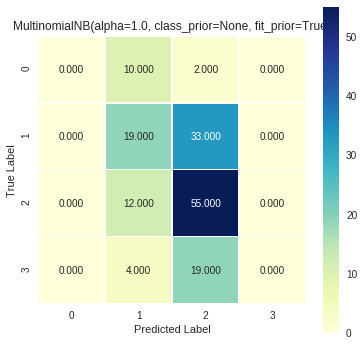

In [93]:
classify_text(nb_basic, X_train_basic, X_test_basic, y_train_basic, y_test_basic);

Training accuracy:  0.8091106290672451
Testing accuracy:  0.4805194805194805


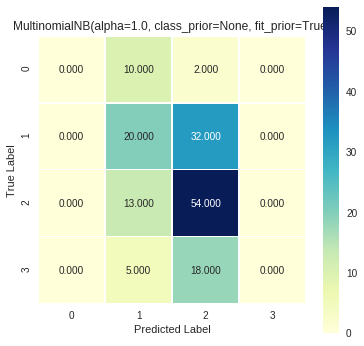

In [94]:
classify_text(nb, X_train, X_test, y_train, y_test);

### Random Forrest

In [62]:
rf_basic = RandomForestClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100)

Training accuracy:  1.0
Testing accuracy:  0.45454545454545453


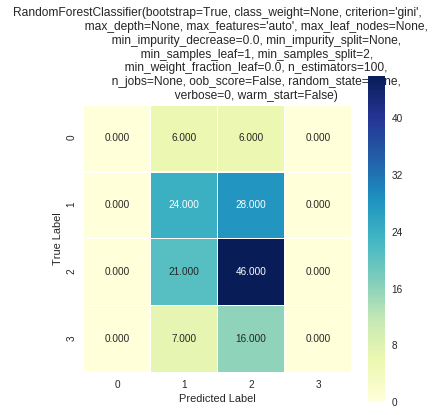

In [91]:
classify_text(rf_basic, X_train_basic, X_test_basic, y_train_basic, y_test_basic);

Training accuracy:  1.0
Testing accuracy:  0.43506493506493504


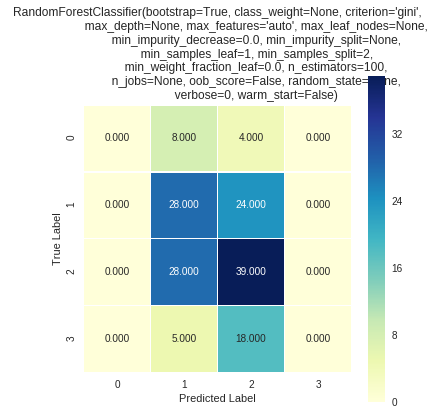

In [92]:
classify_text(rf, X_train, X_test, y_train, y_test);

# Classification Models

## Creating interactions

In [7]:
 #Interactions with reviewer and Afinn Avg Polarity
df['x0_Frank Bruni_X_af_avg_pol'] = df['x0_Frank Bruni'] * df['af_avg_pol']
df['x0_Sam Sifton_X_af_avg_pol'] = df['x0_Sam Sifton'] * df['af_avg_pol']
df['x0_Pete Wells_X_af_avg_pol'] = df['x0_Pete Wells'] * df['af_avg_pol']

 #Interactions with 'vocabulary'
df['x0_Frank Bruni_X_vocab'] = df['x0_Frank Bruni'] * df['vocabulary']
df['x0_Sam Sifton_X_vocab'] = df['x0_Sam Sifton'] * df['vocabulary']
df['x0_Pete Wells_X_vocab'] = df['x0_Pete Wells'] * df['vocabulary']

In [8]:
modeling_df = df.drop(['name', 'rating', 'review_date', 'reviewer', 'review_url',
       'neighborhood', 'review', 'headline', 'tokens', 'area','af_min_pol', 'af_max_pol'], axis=1).copy()

In [9]:
modeling_df.head()

,vocabulary,num_rating,af_avg_pol,af_std_pol,headline_sent,amazing,awesome,bastard,breathtaking,brilliant,catastrophic,damned,ecstatic,exuberant,fabulous,fantastic,fraud,fun,funnier,funny,godsend,heavenly,hell,masterpiece,miracle,outstanding,prick,rapturous,rejoice,slut,stunning,superb,supreme,terrific,terrifically,thrilled,torture,tortured,triumph,triumphant,win,winning,wins,wonderful,wonderfully,wow,x0_Frank Bruni,x0_Pete Wells,x0_Sam Sifton,x0_Brooklyn,x0_Downtown,x0_Midtown,x0_Other,x0_Uptown,x0_Frank Bruni_X_af_avg_pol,x0_Sam Sifton_X_af_avg_pol,x0_Pete Wells_X_af_avg_pol,x0_Frank Bruni_X_vocab,x0_Sam Sifton_X_vocab,x0_Pete Wells_X_vocab
0,416,2,0.886364,1.654414,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886364,0.0,0.0,416.0
1,605,3,0.716216,2.016957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018381,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.716216,0.0,0.0,605.0
2,471,1,0.865385,1.593603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.865385,0.0,0.0,471.0
3,426,2,0.750000,1.854050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.0,0.0,426.0
4,416,1,0.387755,1.536180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.387755,0.0,0.0,416.0


In [10]:
X_m = modeling_df.drop('num_rating', axis=1)
y_m = modeling_df['num_rating']

In [15]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)


## Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train_mms = mms.fit_transform(X_train_m)
X_test_mms = mms.transform(X_test_m)

In [14]:
mms = pickle.load( open("min_max_scale.pkl", "rb"))

/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.21.2 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [16]:
#Use this if importing mms from pickle
X_train_mms = mms.transform(X_train_m)
X_test_mms = mms.transform(X_test_m)

## Logistic Classification

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=5,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


Training accuracy:  0.5670731707317073
Testing accuracy:  0.4959349593495935


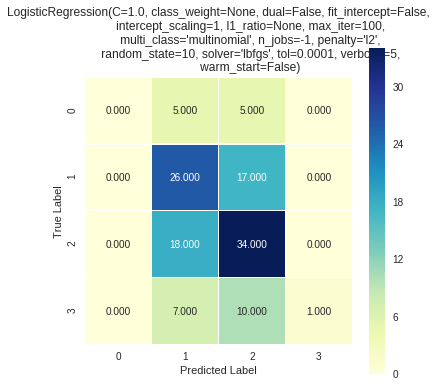

In [96]:
classify_text(lr, X_train_mms, X_test_mms, y_train_m, y_test_m);

## Naive Bayes

In [97]:
nbm = MultinomialNB()

Training accuracy:  0.5
Testing accuracy:  0.5040650406504065


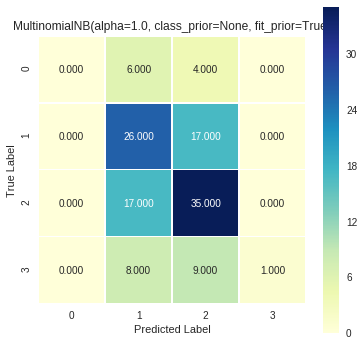

In [98]:
classify_text(nbm, X_train_mms, X_test_mms, y_train_m, y_test_m);

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [100]:
rfcm = RandomForestClassifier()

In [113]:
params_rfc = dict(n_estimators=[80,82,85,87,89,90],max_depth=[3,5,7,9],min_samples_leaf=[.008,.01,.018,.02])

gs_rfc = GridSearchCV(rfcm, params_rfc, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

gs_rfc.fit(X_train_mms, y_train_m)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   14.6s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [114]:
gs_rfc.best_params_

{'max_depth': 3, 'min_samples_leaf': 0.01, 'n_estimators': 80}

In [115]:
pred_train_rfc = gs_rfc.best_estimator_.predict(X_train_mms)
pred_test_rfc = gs_rfc.best_estimator_.predict(X_test_mms)

In [116]:
print('Accuracy train: ', accuracy_score(y_train_m, pred_train_rfc))
print('Accuracy test: ', accuracy_score(y_test_m, pred_test_rfc))

Accuracy train:  0.5182926829268293
Accuracy test:  0.5528455284552846


In [123]:
params_rfc_2 = dict(criterion = ['gini', 'entropy'], n_estimators=[75,77,80,82,85],max_depth=[3,5,7,9],min_samples_leaf=[.005,.008,.01,.015])

gs_rfc_2 = GridSearchCV(estimator = RandomForestClassifier(bootstrap=True, class_weight=None, max_features='auto', random_state=1), 
                        param_grid = params_rfc_2, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

gs_rfc_2.fit(X_train_mms, y_train_m)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   22.3s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'cr

In [124]:
print(gs_rfc_2.best_params_)

pred_train_rfc_2 = gs_rfc_2.best_estimator_.predict(X_train_mms)
pred_test_rfc_2 = gs_rfc_2.best_estimator_.predict(X_test_mms)

print('Accuracy train: ', accuracy_score(y_train_m, pred_train_rfc_2))
print('Accuracy test: ', accuracy_score(y_test_m, pred_test_rfc_2))

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 0.01, 'n_estimators': 85}
Accuracy train:  0.524390243902439
Accuracy test:  0.5121951219512195


## XGBoost

In [17]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from xgboost import XGBClassifier
import xgboost as xg

In [18]:
data_dmatrix = xg.DMatrix(data=X_train_mms,label=y_train_m)

params = {"objective":"multi:softmax","num_class":4,'colsample_bytree': 0.3,'learning_rate': 0.005,
                'max_depth': 2, 'alpha': 10}

cv_results = xg.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=500,early_stopping_rounds=20,
                   metrics="merror", as_pandas=True, seed=123,verbose_eval=5)
cv_results 

[0]	train-merror:0.575206+0.00761287	test-merror:0.617996+0.0290931
[5]	train-merror:0.490857+0.0126758	test-merror:0.577386+0.0579876


/Users/samantha/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10]	train-merror:0.490363+0.0221245	test-merror:0.589425+0.0210251
[15]	train-merror:0.486798+0.0179017	test-merror:0.579303+0.020163
[20]	train-merror:0.487311+0.0157234	test-merror:0.583303+0.0270011


,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.575206,0.007613,0.617996,0.029093
1,0.536593,0.020416,0.595650,0.045015
2,0.504566,0.020027,0.550876,0.019119


In [21]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=50,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch1.fit(X_train_mms,y_train_m)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [22]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.464950715563877)

In [23]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=50,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch2.fit(X_train_mms,y_train_m)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:    7.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [24]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 2, 'min_child_weight': 5}, 0.4667280193199206)

In [25]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005,colsample_bytree=.3, n_estimators=50, subsample=0.8, 
                                    max_depth=2, min_child_weight=5, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch3.fit(X_train_mms,y_train_m)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    2.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=5, missing=None,
       n_estimators=50, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [26]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, 0.4667280193199206)

In [29]:
param_test4 = {
 'subsample':[i/100.0 for i in range(70,90,5)],
 'colsample_bytree':[i/100.0 for i in range(25,40,5)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005, n_estimators=50, max_depth=2, min_child_weight=5, gamma=0, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test4, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch4.fit(X_train_mms,y_train_m)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.005, max_delta_step=0,
       max_depth=2, min_child_weight=5, missing=None, n_estimators=50,
       n_jobs=1, nthread=4, num_class=4, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.75, 0.8, 0.85], 'colsample_bytree': [0.25, 0.3, 0.35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [30]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.3, 'subsample': 0.85}, 0.46899484394052704)

In [31]:
param_test5 = {
 'subsample':[i/100.0 for i in range(82,87)],
 'colsample_bytree':[i/100.0 for i in range(27,33)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005, n_estimators=50, max_depth=2, min_child_weight=5, gamma=0, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test5, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch5.fit(X_train_mms,y_train_m)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   17.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.005, max_delta_step=0,
       max_depth=2, min_child_weight=5, missing=None, n_estimators=50,
       n_jobs=1, nthread=4, num_class=4, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.82, 0.83, 0.84, 0.85, 0.86], 'colsample_bytree': [0.27, 0.28, 0.29, 0.3, 0.31, 0.32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [32]:
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.28, 'subsample': 0.84}, 0.47713791997756483)

In [39]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005, n_estimators=50,subsample=.84,colsample_bytree=.28,
                                    max_depth=2, min_child_weight=5, gamma=0, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test6, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch6.fit(X_train_mms,y_train_m)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1644s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    2.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.28, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=5, missing=None,
       n_estimators=50, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.84),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [40]:
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1}, 0.48713910734645943)

In [41]:
param_test7 = {
 'reg_alpha':[0,.5,1,1.5]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005, n_estimators=50,subsample=.84,colsample_bytree=.28,
                                    max_depth=2, min_child_weight=5, gamma=0, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test7, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch7.fit(X_train_mms,y_train_m)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.28, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=5, missing=None,
       n_estimators=50, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.84),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [0, 0.5, 1, 1.5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=10)

In [42]:
gsearch7.best_params_, gsearch7.best_score_

({'reg_alpha': 1}, 0.48713910734645943)

In [46]:
param_test8 = {
 'n_estimators':[40,45,50,55,60]
}

gsearch8 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.005, reg_alpha=1,subsample=.84,colsample_bytree=.28,
                                    max_depth=2, min_child_weight=5, gamma=0, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test8, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch8.fit(X_train_mms,y_train_m)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    3.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.28, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=2, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=1,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.84),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [40, 45, 50, 55, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [47]:
gsearch8.best_params_, gsearch8.best_score_

({'n_estimators': 50}, 0.48713910734645943)